In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

Цель проекта:

Анализ данных и проверка гипотез, которые помогут бизнесу вырасти.

План работы:

Шаг 1. Загрузка данных.

1.1 Считать csv-файлы с данными.

1.2 Вывести первые строчки датафрейма.

1.3 Изучить информацию и написать вывод.

Шаг 2. Предобратотка данных.

2.1 Привести столбец date к типу данных pandas (datetime)

2.2 Создать столбец с номером месяца на основе столбца date

2.3 Проверить наличие пропусков и дубликатов. Обратока их, если они присутствуют.

Шаг 3.Исследовательский анализ данных.

Описать и визуализировать общую информацию о пользователях и поездках

3.1 частота встречаемости городов;

3.2 соотношение пользователей с подпиской и без подписки; 

3.3 возраст пользователей;

3.4 расстояние, которое пользователь преодолел за одну поездку;

3.5 продолжительность поездок.

Шаг 4. Объединение данных.

4.1 Объединить данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

4.2 Создайть ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки; с данными о пользователях с подпиской.

4.3 Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

Шаг 5. Подсчёт выручки.

5.1 Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдити суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 5.2 В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь.

Шаг 6. Проверка гипотез

6.1 Тратят ли пользователи с подпиской больше времени на поездки?

6.2 Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

6.3. Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

7. Выводы по результатам исследования.


#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Датафрейм users содержит 5 колонок и 1565 строк. Пропущенных значений в датафрейме нет. Столбцов, которые нужно перевести в другой тип объекта нет.**

In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


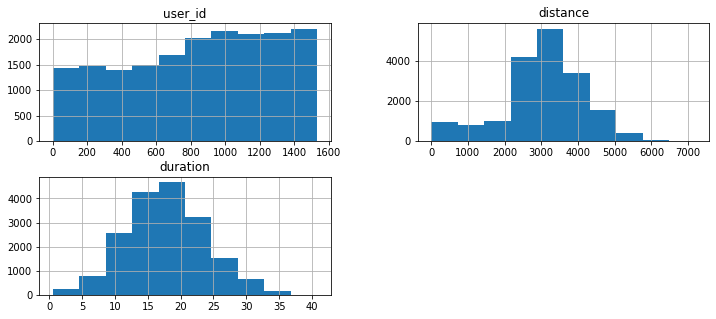

In [7]:
rides.hist()
plt.show()

**Датафрейм rides содержит 4 колонки и 18068 строк. Пропущенных значений в датафрейме нет. Столбец date необходимо перевести в формат to_datetime.
Судя по гистограммам в столбцах duration и distance есть редкие значения и выбросы.
Только для этого датафрейма вывел гистрограммы т.к. только тут есть значения, которые могут иметь выбросы.**

In [8]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Датафрейм subscriptions содержит 4 колоноки и 2 строки. Пропущенных значений в датафрейме нет. Столбцов, которые нужно перевести в другой тип объекта нет.**

#### Шаг 2. Предобработка данных

Привел столбец date к типу даты pandas.

In [10]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [11]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создал новый столбец с номером месяца на основе столбца date.

In [12]:
rides['month'] = rides['date'].dt.month

In [13]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверяю на  наличие пропущенных значений и дубликатов в датафреймах.

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
users.duplicated().sum()

31

Имеется 31 дубликат. Проверю сколько процентов от датафрейма занимают дубликаты.

In [16]:
users.duplicated().mean()*100

1.9808306709265175

Удаляю дубликаты.

In [17]:
users = users.drop_duplicates().reset_index(drop=True)

In [18]:
users.duplicated().sum()

0

In [19]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [20]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [21]:
rides.duplicated().sum()

0

In [22]:
subscriptions.duplicated().sum()

0

In [23]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверил наличие пропусков и дубликатов в датафреймах. 
Обнаруженные дубликаты в датафрейме users, были удалены.

#### Шаг 3. Исследовательский анализ данных

In [24]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

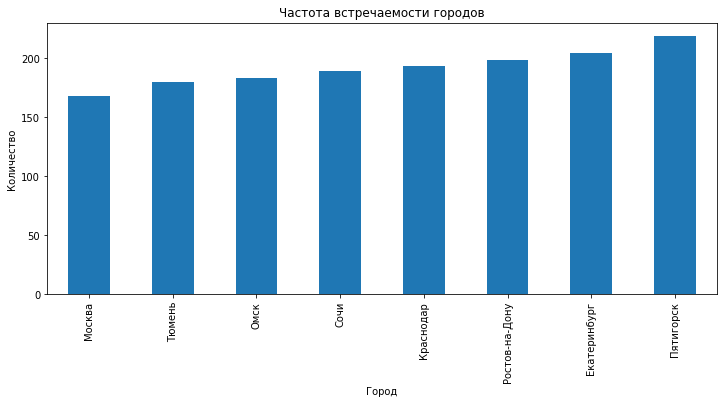

In [25]:
users['city'].value_counts(ascending=True).plot.bar()
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Частота встречаемости городов')
plt.show()

Чаще всего встречается город Пятигорск с 219 пользователями. Самый менее встречающийся город Москва с 168 пользователями. Такое соотношение может быть связано с большей конкуренцией в крупных горадах.

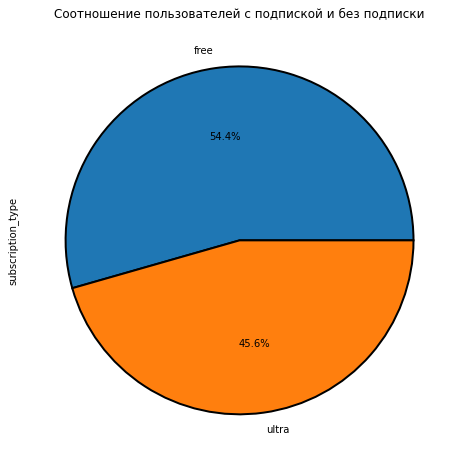

In [26]:
users['subscription_type'].value_counts()\
.plot(kind='pie', autopct='%1.1f%%', figsize = (8, 8), wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

На круговой диаграмме показано соотношение пользователей с подпиской (ultra) и без подписки (free). Несмотря на то, что пользователи без подписки составляют около 54.4% от общего числа пользователей, а пользователи с подпиской — около 45.6%. Это подтверждает, что хотя количество пользователей без подписки больше, разрыв незначителен, и обе группы представлены почти равномерно.

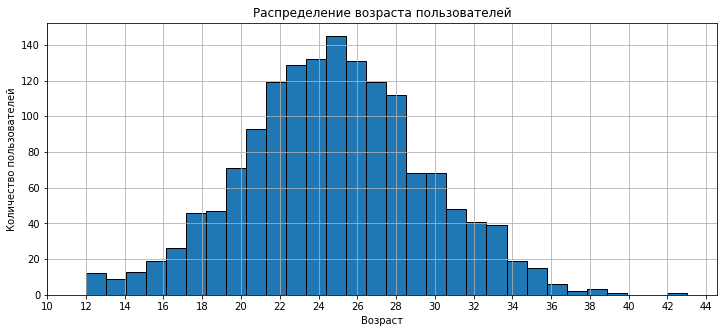

In [27]:
users['age'].hist(bins=30, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.xticks(range(10,46,2))
plt.show()

На гистограмме видно, что основная масса пользователей в возрасте от 20 до 30 лет.

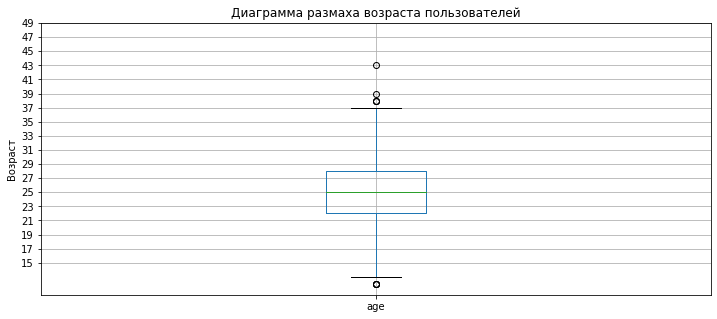

In [28]:
users.boxplot('age')
plt.title('Диаграмма размаха возраста пользователей')
plt.ylabel('Возраст')
plt.yticks(range(15,50,2))
plt.show()

In [29]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

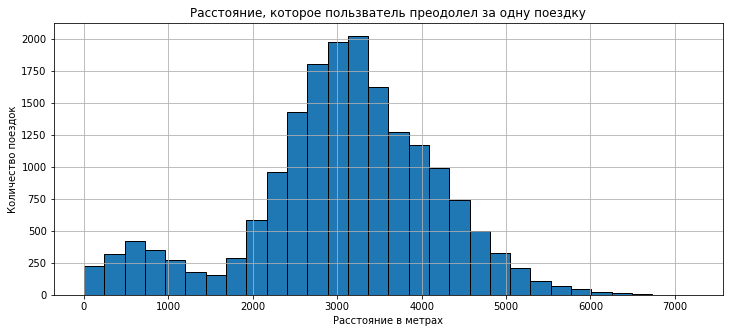

In [30]:
rides['distance'].hist(bins=30, edgecolor='black')
plt.title('Расстояние, которое пользватель преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

На гистограмме видно, что в основом пользователи проезжают от 2700 до 3300 метров за одну поездку.

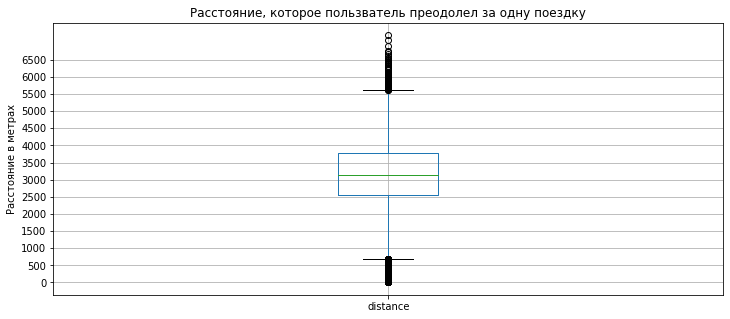

In [31]:
rides.boxplot('distance')
plt.title('Расстояние, которое пользватель преодолел за одну поездку')
plt.ylabel('Расстояние в метрах')
plt.yticks(range(0,7000,500))
plt.show()

In [32]:
#import numpy as np

In [33]:
#rides['duration'] = np.ceil(rides['duration'])

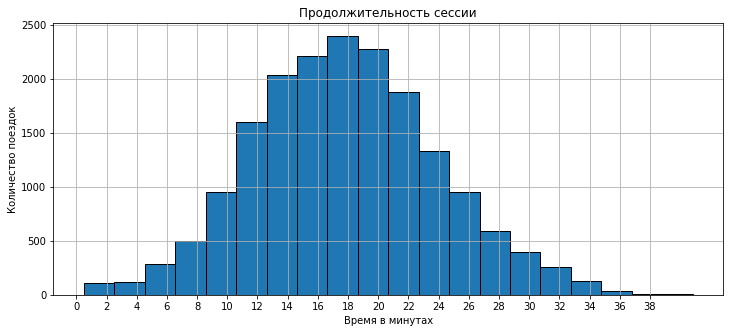

In [34]:
rides['duration'].hist(bins = 20, edgecolor='black')
plt.title('Продолжительность сессии')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.xticks(range(0,40,2))
plt.show()

Наиболее типичное время от 17 до 21 минуты.

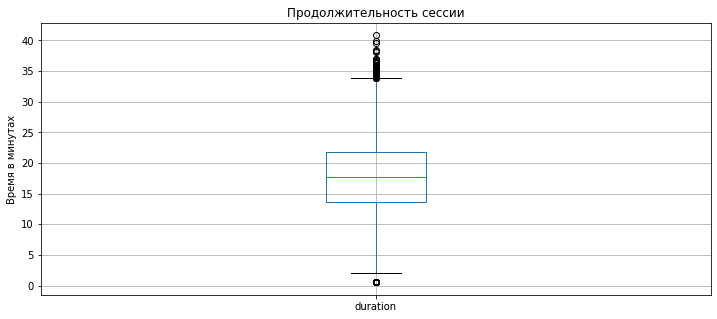

In [35]:
rides.boxplot('duration')
plt.title('Продолжительность сессии')
plt.ylabel('Время в минутах')
plt.yticks(range(0,45,5))
plt.show()

По итогам исследования данных выявлены следующие ключевые аспекты:

Частота встречаемости городов: Чаще всего встречается город Пятигорск с 219 пользователями. Самый менее встречающийся город Москва с 168 пользователями. Такое соотношение может быть связано с большей конкуренцией в крупных горадах.

Соотношение пользователей с подпиской и без: несмотря на то, что количество пользователей без подписки больше (54%),чем с подпиской (46%) разрыв незначителен, и обе группы представлены почти равномерно.

Возрастная структура пользователей: Основная часть пользователей находится в возрасте от 20 до 30 лет.

Расстояние, которое пользватель преодолел за одну поездку: в основом пользователи проезжают от 2700 до 3300 метров за одну поездку.

Продолжительность поездок: Большинство поездок длится от 17 до 21 минуты, с пиком около 19 минут. 



#### Шаг 4. Объединение данных

**Объединяю данные о пользователях, поездках и подписках в один датафрейм.**

In [36]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [37]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [38]:
rides.shape

(18068, 5)

In [39]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [40]:
merge_data = pd.merge(users, rides, on='user_id')
merge_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [41]:
merge_data = pd.merge(merge_data, subscriptions, on='subscription_type')
merge_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [42]:
merge_data.shape

(18068, 12)

Создал датафрейм с данными о пользователях с подпиской.

In [43]:
subscription_ultra = merge_data[merge_data['subscription_type'] == 'ultra']
subscription_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Создал датафрейм с данными о пользователях без подписки.

In [44]:
subscription_free = merge_data[merge_data['subscription_type'] == 'free']
subscription_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


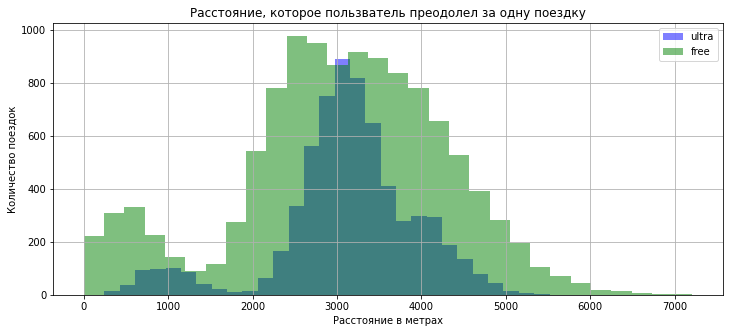

In [45]:
subscription_ultra['distance'].hist(bins=30, label = 'ultra', alpha=0.5, color='blue')
subscription_free['distance'].hist(bins=30, label = 'free', alpha=0.5, color='green')
plt.title('Расстояние, которое пользватель преодолел за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Сходства:

Большинство поездок для обоих тарифов укладывается в диапазон от 2000 до 4000 метров.

Различия:

В тарифе "free" больше коротких поездок (до 2000 метров), чем в тарифе "ultra".

Пользователи тарифа "ultra" совершают немного больше поездок на большие расстояния (свыше 5000 метров), чем пользователи тарифа "free".


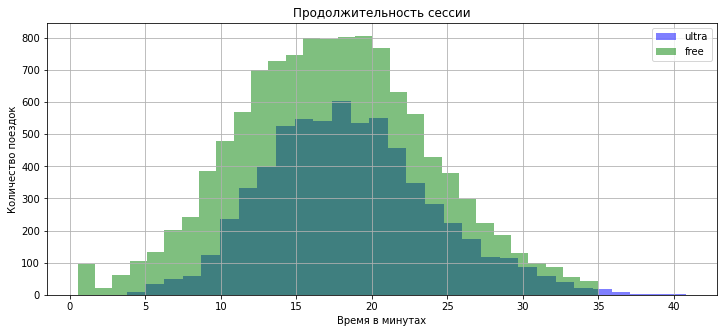

In [46]:
subscription_ultra['duration'].hist(bins=30, label = 'ultra', alpha=0.5, color='blue')
subscription_free['duration'].hist(bins=30, label = 'free', alpha=0.5, color='green')
plt.title('Продолжительность сессии')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Сходства:

Пик продолжительности поездок для обоих тарифов приходится на интервал 15-20 минут.

Большинство поездок для обоих тарифов укладывается в диапазон от 10 до 25 минут.

Различия:

Тариф "free" имеет более выраженную плотность в коротких поездках (до 10 минут), чем тариф "ultra".

В тарифе "ultra" наблюдаются единичные поездки, превышающие 35 минут, что практически отсутствует в тарифе "free".


Оба тарифа показывают схожее распределение как по продолжительности сессий, так и по пройденному расстоянию за одну поездку.

Основная масса поездок имеет продолжительность около 15-20 минут и расстояние около 3000 метров.

Тариф "ultra" имеет небольшое количество более продолжительных поездок (как по времени, так и по расстоянию) по сравнению с тарифом "free".

В среднем, для тарифа "free" количество коротких поездок (как по времени, так и по расстоянию) несколько выше, чем для тарифа "ultra".



#### Шаг 5. Подсчёт выручки

Создал датафрейм на основе merge_data. Нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [47]:
import numpy as np

merge_data['duration'] =  np.ceil(merge_data['duration'])

merge_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [48]:
df_revenue = merge_data.groupby(['user_id', 'month']) \
    .agg(total_distance=('distance', 'sum'),
         total_duration=('duration', 'sum'),
         trip_count=('distance', 'count'),
         subscription_type=('subscription_type', 'first'),
         subscription_fee=('subscription_fee', 'first'),
         start_ride_price=('start_ride_price', 'first'),
         minute_price=('minute_price', 'first')
         ) \
    .reset_index()

df_revenue.head()

,user_id,month,total_distance,total_duration,trip_count,subscription_type,subscription_fee,start_ride_price,minute_price
0,1,1,7027.511294,42.0,2,ultra,199,0,6
1,1,4,754.159807,7.0,1,ultra,199,0,6
2,1,8,6723.470560,46.0,2,ultra,199,0,6
3,1,10,5809.911100,32.0,2,ultra,199,0,6
4,1,11,7003.499363,56.0,3,ultra,199,0,6


In [49]:
#import numpy as np

#df_revenue['total_duration'] =  np.ceil(df_revenue['total_duration'])

#df_revenue.head()

В этот же датафрейм добавил столбец с помесячной выручкой, которую принёс каждый пользователь

In [50]:
df_revenue['monthly_revenue'] = \
(df_revenue['start_ride_price']*df_revenue['trip_count']) + \
(df_revenue['minute_price']*df_revenue['total_duration']) + \
df_revenue['subscription_fee']

In [51]:
df_revenue.head()

,user_id,month,total_distance,total_duration,trip_count,subscription_type,subscription_fee,start_ride_price,minute_price,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,199,0,6,451.0
1,1,4,754.159807,7.0,1,ultra,199,0,6,241.0
2,1,8,6723.470560,46.0,2,ultra,199,0,6,475.0
3,1,10,5809.911100,32.0,2,ultra,199,0,6,391.0
4,1,11,7003.499363,56.0,3,ultra,199,0,6,535.0


#### Шаг 6. Проверка гипотез

**Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Нулевая гипотеза (H0):
Среднее время, затрачиваемое на поездки пользователями с подпиской, не отличается от среднего времени, затрачиваемого пользователями без подписки.

Альтернативная гипотеза (H1):
Среднее время, затрачиваемое на поездки пользователями с подпиской, больше среднего времени, затрачиваемого пользователями без подписки.

Гипотеза о равенстве средних двух генеральных совокупностей.

In [52]:
import scipy.stats as st

In [53]:
alpha = 0.05

results = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу.')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


Есть основания говорить, что пользователи с подпиской  тратят больше времени на поездки.

**Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

Нулевая гипотеза (H0):
Расстояние одной поездки 3130 метров.

Альтернативная гипотеза (H1):
Расстояние одной поездки больше 3130 метров.

Проверка односторонней гипотезы.

In [54]:
distance = 3130

alpha = 0.05

results = st.ttest_1samp(subscription_ultra['distance'], distance,
    alternative='greater')

print('p-значение:', results.pvalue ) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')



p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу.


Есть основания говорить, что пользователи с подпиской проезжают в среднем  3130 метров.

**Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

Нулевая гипотеза (H0):
Помесячная выручка от пользователей с подпиской равна помесячной выручка от пользователей без подписки.

Альтернативная гипотеза (H1):
Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза о равенстве средних двух генеральных совокупностей.


In [55]:
alpha = 0.05

results = st.ttest_ind(df_revenue.loc[df_revenue['subscription_type'] == 'ultra','monthly_revenue'], \
                       df_revenue.loc[df_revenue['subscription_type'] == 'free','monthly_revenue'], \
                      alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу. ')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Нулевая гипотеза (H0): Количество обращений не изменилось или увеличилось после обновления серверов.

Альтернативная гипотеза (H1): Количество обращений снизилось после обновления серверов

Ответ: Гипотеза о равенстве средних для зависимых (парных) выборок.

Если указать alternative='greater', проверится правосторонняя гипотеза, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения.

Пример такого теста:

In [56]:
appeals_before = [12, 15, 14, 10, 13, 16, 14, 11, 12, 14]
appeals_after = [10, 13, 12, 8, 11, 14, 13, 9, 11, 13]

alpha = 0.05

results = st.ttest_rel(appeals_before, appeals_after, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 7.294735614724296e-07
Отвергаем нулевую гипотезу.


Есть основания полагать, что количество обращений снизилось после обновления серверов.

#### Шаг 7. Выводы по результатам исследования:

Обработка данных:

Выполнена качественная очистка данных, включающая удаление дубликатов, корректную типизацию данных и предобработку.

Анализ данных:

Проведен всесторонний исследовательский анализ данных, в результате которого выявлены основные распределения и выбросы. Были обнаружены редкие значения и аномалии, которые следует учитывать в дальнейшем моделировании и принятии управленческих решений.

Проверка гипотез:

Время на поездки пользователей с подпиской:Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

Среднее расстояние одной поездки для пользователей с подпиской: Есть основания говорить, что пользователи с подпиской проезжают в среднем 3130 метров.



Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Рекомендации:

Маркетинговые усилия: Рекомендуется усилить маркетинговые кампании, направленные на привлечение новых подписчиков, акцентируя внимание на преимуществах подписки, таких как большее количество поездок, длительные поездки, и экономическая выгода.

Развитие системы поощрений: Учитывая, что пользователи с подпиской приносят большую помесячную выручку, стоит усилить программы лояльности, предоставляя дополнительные преимущества и бонусы для подписчиков. Например, можно внедрить накопительные скидки или эксклюзивные предложения для подписчиков, что может стимулировать рост числа подписок и удержание текущих пользователей.

Поскольку пользователи с подпиской тратят больше времени на поездки, можно рассмотреть возможность создания специальных предложений для таких пользователей, например, скидок на долгосрочные поездки или введения бонусов за использование сервиса в определенные часы.


 
 